In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from pltconfig import *

In [2]:
# This is the raw data from the Spark plate reader. Will smooth it for plotting. 
glycerol_df = pd.read_csv('data/sup_figs/092217_spark_m9glycerol_5pct_raw.csv')
gluconate_df = pd.read_csv('data/sup_figs/092717_spark_m9gluconate_5pct_raw.csv')

In [3]:
# Smoothing is windowed mean twice over a 3 measurement window
# Note: data not blanked - not calculating a growth rate, so this is OK. 
od_cols = glycerol_df.columns[4:]
smoothed_gly = glycerol_df.copy()
smoothed_gly[od_cols] = smoothed_gly[od_cols].rolling(3, min_periods=1).apply(np.nanmean)
smoothed_gly[od_cols] = smoothed_gly[od_cols].rolling(3, min_periods=1).apply(np.nanmean)

# Note: need the nanmean because there were some "OVER" measurements in the first couple cycles of the gluconate data.
smoothed_glucon = gluconate_df.copy()
smoothed_glucon[od_cols] = smoothed_glucon[od_cols].rolling(3, min_periods=1).apply(np.nanmean)
smoothed_glucon[od_cols] = smoothed_glucon[od_cols].rolling(3, min_periods=1).apply(np.nanmean)

In [4]:
positive_contols = [c for c in od_cols if c.startswith('bwGFP + aTc')]
negative_controls = [c for c in od_cols if c.startswith('CCMB1 K194M + aTc')]
exp_all = [c for c in od_cols if c.startswith('CCMB1 lsPrk')]
exp_induced = [c for c in exp_all if c.startswith('CCMB1 lsPrk + aTc')]
exp_uninduced = [c for c in exp_all if not c.startswith('CCMB1 lsPrk + aTc')]

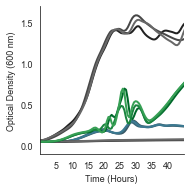

In [7]:
figure = plt.figure(figsize=(2.75,2.75))
sns.set_style('white')

# gluconate data
time_h_glucon = smoothed_glucon.time_s / (60*60)
for i, name in enumerate(exp_induced):
    if i >= 3: break
    c = blue_greens[i+1]
    plt.plot(time_h_glucon, smoothed_glucon[name], color=c, lw=2)

# glycerol data
time_h_gly = smoothed_gly.time_s / (60*60)
for i, name in enumerate(positive_contols):
    if i >= 3: break
    c = greys[-i-1]
    plt.plot(time_h_gly, smoothed_gly[name], color=c, lw=2)

for i, name in enumerate(negative_controls):
    if i >= 3: break
    c = greys[-i-1]
    plt.plot(time_h_gly, smoothed_gly[name], color=c, lw=2)

for i, name in enumerate(exp_induced):
    if i >= 3: break
    c = greens[-i-1]
    plt.plot(time_h_gly, smoothed_gly[name], color=c, lw=2)
    
plt.xticks(np.arange(5, 41, 5), fontsize=9)
plt.yticks(np.arange(0, 1.55, 0.5), fontsize=9)
plt.xlim(0, 45)
plt.ylim(-0.1, 1.7)
sns.despine()
plt.xlabel('Time (Hours)', fontsize=9)
plt.ylabel('Optical Density (600 nm)', fontsize=9)

plt.tight_layout()
plt.savefig('fig2/fig2S3.png', dpi=600)
plt.show()

In [6]:
print('Positive controls:', len(positive_contols))
print('Negative controls:', len(positive_contols))
print('Induced experiments:', len(exp_induced))

Positive controls: 6
Negative controls: 6
Induced experiments: 6
